<a href="https://colab.research.google.com/github/kavyasenthamarai/nn-classification/blob/main/EXP_2_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KAVYA K   212222230065


Epoch 1/200
24/24 [==============================] - 1s 11ms/step - loss: 1.6638 - accuracy: 0.2224 - val_loss: 1.4266 - val_accuracy: 0.2205
Epoch 2/200
24/24 [==============================] - 0s 4ms/step - loss: 1.4023 - accuracy: 0.2432 - val_loss: 1.3809 - val_accuracy: 0.2759
Epoch 3/200
24/24 [==============================] - 0s 4ms/step - loss: 1.3639 - accuracy: 0.3316 - val_loss: 1.3596 - val_accuracy: 0.3404
Epoch 4/200
24/24 [==============================] - 0s 4ms/step - loss: 1.3442 - accuracy: 0.3634 - val_loss: 1.3448 - val_accuracy: 0.3583
Epoch 5/200
24/24 [==============================] - 0s 4ms/step - loss: 1.3279 - accuracy: 0.3791 - val_loss: 1.3327 - val_accuracy: 0.3604
Epoch 6/200
24/24 [==============================] - 0s 4ms/step - loss: 1.3152 - accuracy: 0.3866 - val_loss: 1.3230 - val_accuracy: 0.3861
Epoch 7/200
24/24 [==============================] - 0s 5ms/step - loss: 1.3036 - accuracy: 0.3929 - val_loss: 1.3109 - val_accuracy: 0.3872
Epoch 8/200


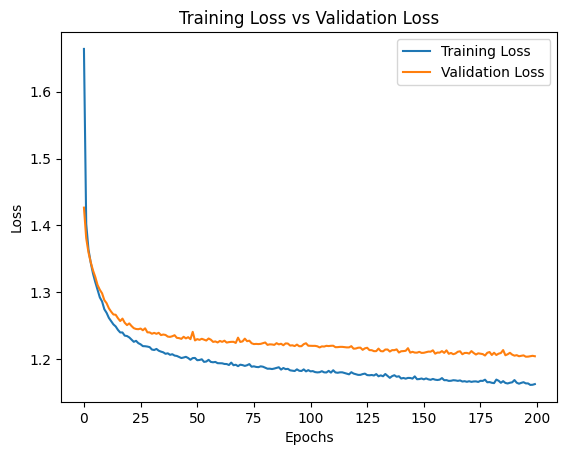

91/91 [==============================] - 0s 1ms/step
[[340 167  91 159]
 [203 213 170 100]
 [103 169 327  87]
 [197  79  43 463]]
              precision    recall  f1-score   support

           0       0.40      0.45      0.42       757
           1       0.34      0.31      0.32       686
           2       0.52      0.48      0.50       686
           3       0.57      0.59      0.58       782

    accuracy                           0.46      2911
   macro avg       0.46      0.46      0.46      2911
weighted avg       0.46      0.46      0.46      2911



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 70ms/step
[2]
['C']


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
import pickle
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pylab as plt

customer_df = pd.read_csv('customers.csv')


customer_df_cleaned = customer_df.dropna(axis=0)

categories_list = [['Male', 'Female'],
                   ['No', 'Yes'],
                   ['No', 'Yes'],
                   ['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
                    'Homemaker', 'Entertainment', 'Marketing', 'Executive'],
                   ['Low', 'Average', 'High']]

enc = OrdinalEncoder(categories=categories_list)
customers_1 = customer_df_cleaned.copy()
customers_1[['Gender',
             'Ever_Married',
             'Graduated', 'Profession',
             'Spending_Score']] = enc.fit_transform(customers_1[['Gender',
                                                                   'Ever_Married',
                                                                   'Graduated', 'Profession',
                                                                   'Spending_Score']])
le = LabelEncoder()
customers_1['Segmentation'] = le.fit_transform(customers_1['Segmentation'])

customers_1 = customers_1.drop('ID', axis=1)
customers_1 = customers_1.drop('Var_1', axis=1)

# Splitting the dataset into features and target variable
X = customers_1[['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession', 'Work_Experience', 'Spending_Score', 'Family_Size']].values
y1 = customers_1[['Segmentation']].values


one_hot_enc = OneHotEncoder()
one_hot_enc.fit(y1)
y = one_hot_enc.transform(y1).toarray()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=50)


scaler_age = MinMaxScaler()
scaler_age.fit(X_train[:, 2].reshape(-1, 1))
X_train_scaled = np.copy(X_train)
X_test_scaled = np.copy(X_test)
X_train_scaled[:, 2] = scaler_age.transform(X_train[:, 2].reshape(-1, 1)).reshape(-1)
X_test_scaled[:, 2] = scaler_age.transform(X_test[:, 2].reshape(-1, 1)).reshape(-1)


updated_model = Sequential([
    Dense(10, input_shape=(8,), activation='relu'),
    Dense(16, activation='relu'),
    Dense(24, activation='relu'),
    Dense(4, activation='softmax')
])


updated_model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])


history = updated_model.fit(x=X_train_scaled, y=y_train,
                            epochs=200, batch_size=256,
                            validation_data=(X_test_scaled, y_test))


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs Validation Loss')
plt.legend()
plt.show()

y_pred = updated_model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)


print(confusion_matrix(y_true, y_pred_classes))
print(classification_report(y_true, y_pred_classes))


updated_model.save('customer_classification_model_updated.h5')
with open('customer_data_updated.pickle', 'wb') as fh:
    pickle.dump([X_train_scaled, y_train, X_test_scaled, y_test, customers_1, customer_df_cleaned, scaler_age, enc, one_hot_enc, le], fh)


updated_model_loaded = load_model('customer_classification_model_updated.h5')
with open('customer_data_updated.pickle', 'rb') as fh:
    [X_train_scaled, y_train, X_test_scaled, y_test, customers_1, customer_df_cleaned, scaler_age, enc, one_hot_enc, le] = pickle.load(fh)

x_single_prediction = np.argmax(updated_model_loaded.predict(X_test_scaled[1:2, :]), axis=1)
print(x_single_prediction)
print(le.inverse_transform(x_single_prediction))
